In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
### i did this code originally but was unable to figure out how to use for the histogram so tried to go another route - eventually figured it out by trouble shooting with colleague.
engine.execute('SELECT max(date) FROM Measurement').fetchall()


[('2017-08-23',)]

In [65]:
recent=engine.execute('SELECT max(date) FROM Measurement').fetchone()
most_recent_date = recent[0]
print("Most Recent:", most_recent_date)

Most Recent: 2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation score
pre_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()

In [11]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
pre_df = pd.DataFrame(pre_data).set_index('date')
pre_df=pre_df.rename(columns={'prcp':'precipitation'})

In [12]:
# Sort the dataframe by date
pre_df=pre_df.sort_values(by='date').dropna()
pre_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


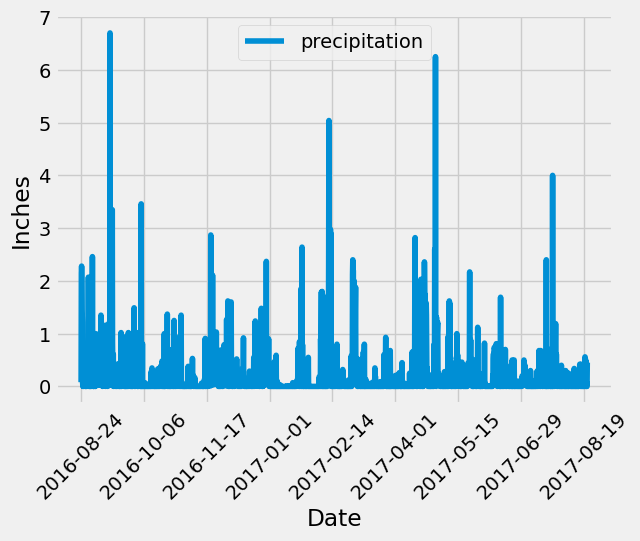

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
pre_df.plot(rot=45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
pre_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).count() 
print(f'Station Count: {station_count}')

Station Count: 9


In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
busy_station = 'USC00519281'
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == busy_station).all()

[(54.0, 85.0, 71.66378066378067)]

In [51]:
last_12 = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_12

datetime.datetime(2016, 8, 23, 0, 0)

<Axes: ylabel='Frequency'>

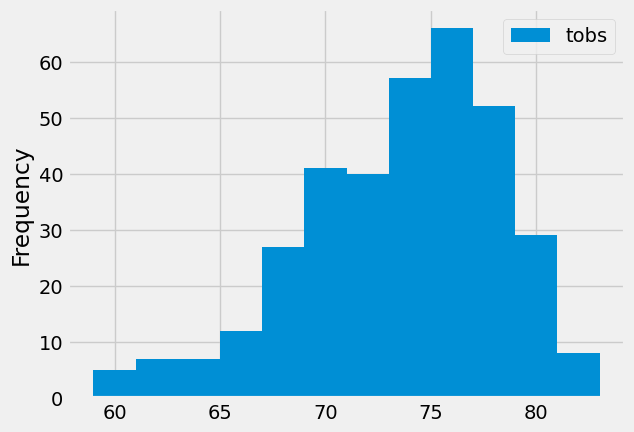

In [63]:
results = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-24").\
                        filter(Measurement.date <= "2017-08-23").\
                        filter(Measurement.station == 'USC00519281').all()

res_df = pd.DataFrame(results)

res_df.plot.hist(bins=12)


Text(0.5, 4.183333333333314, 'Temperature')

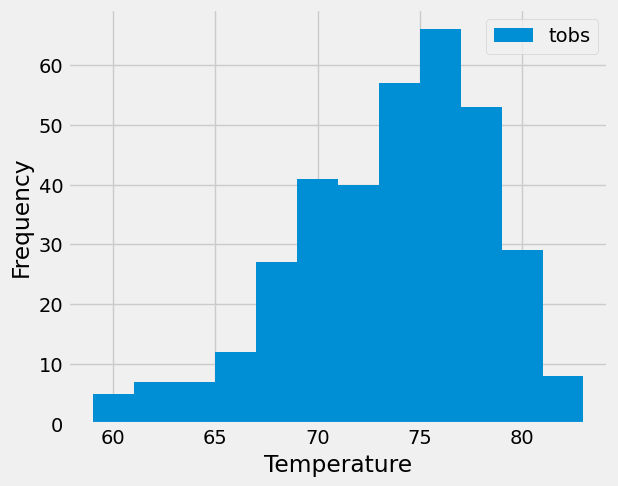

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [66]:
# Close Session
session.close()